In [112]:
from torch.autograd import Variable
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y=x.pow(2)+0.2*torch.randn(x.size())

In [113]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden)
        self.predict=torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.predict(x)
        return x

In [114]:
net=Net(n_feature=1,n_hidden=10,n_output=1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [115]:
optimizer=torch.optim.SGD(net.parameters(),lr=0.2)
loss_func=torch.nn.MSELoss()
plt.ion()

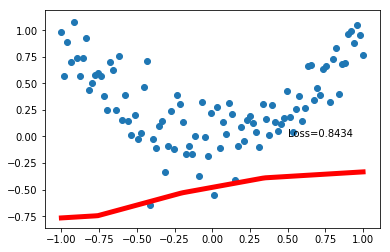

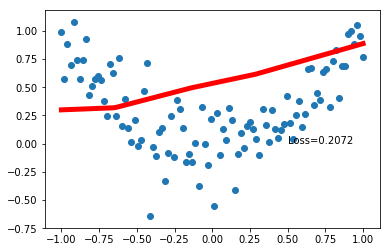

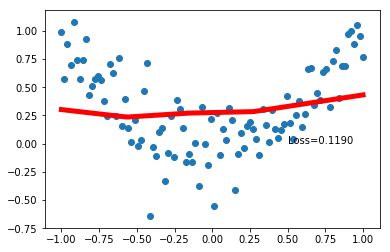

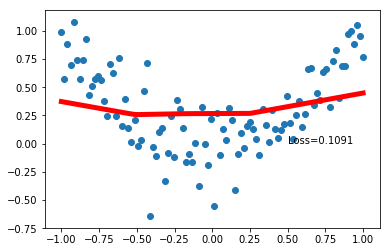

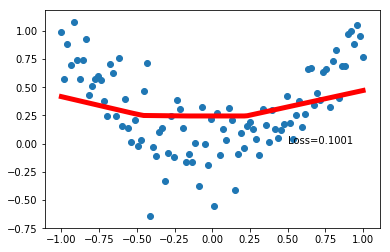

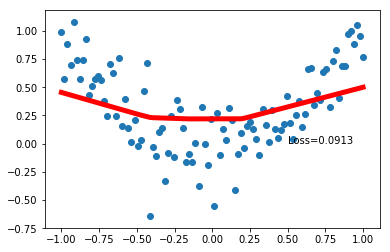

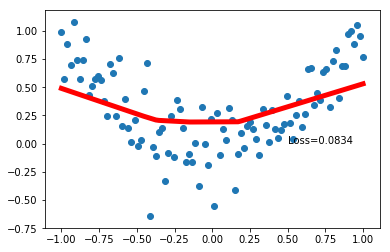

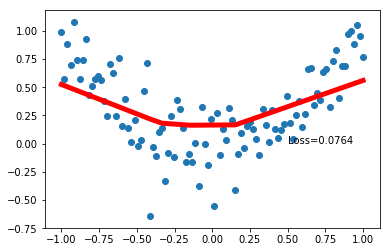

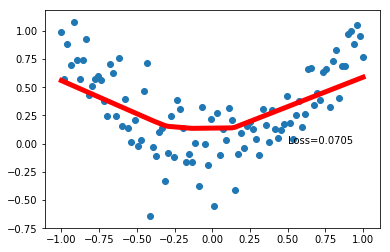

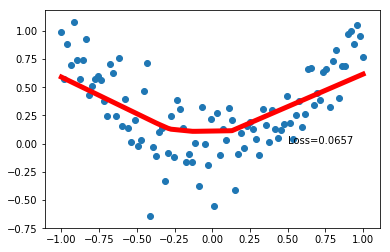

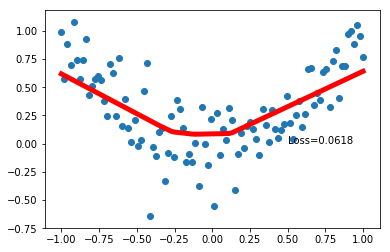

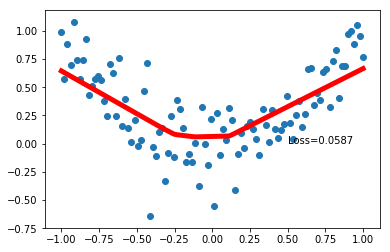

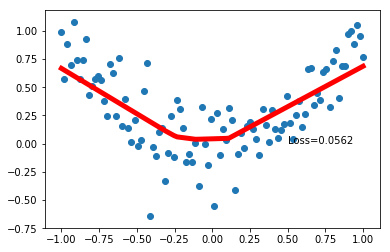

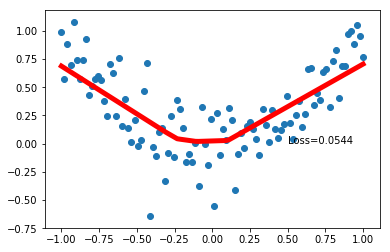

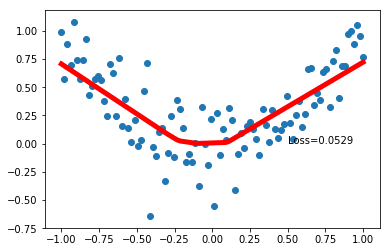

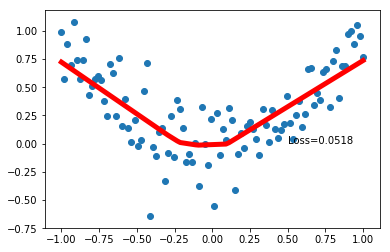

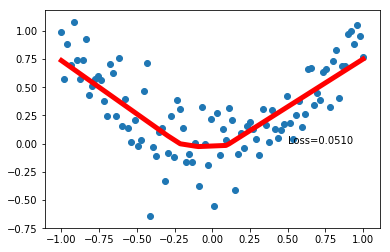

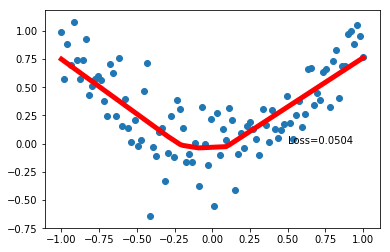

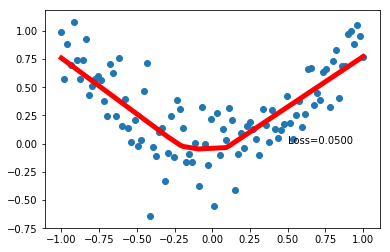

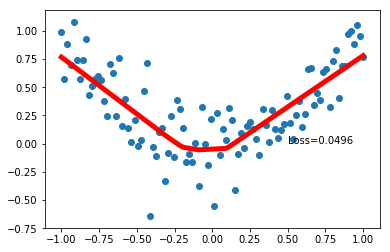

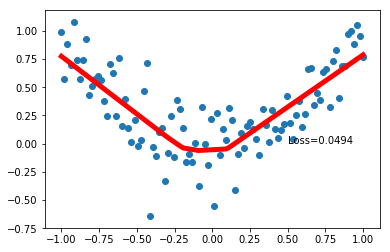

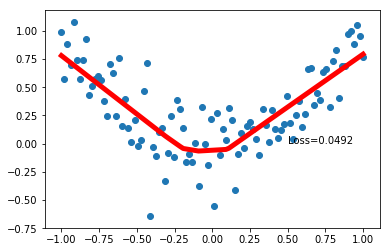

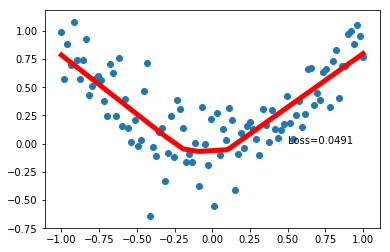

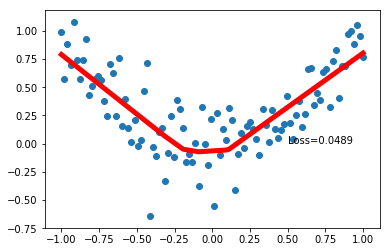

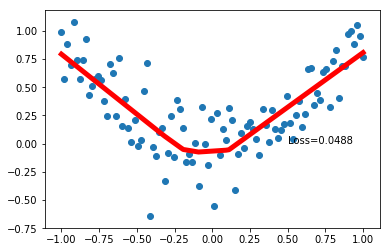

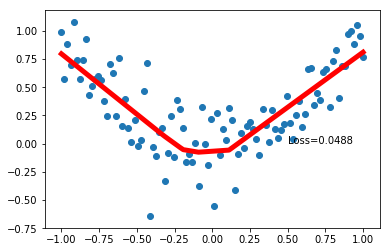

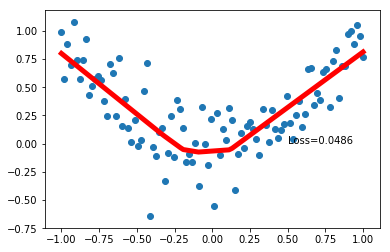

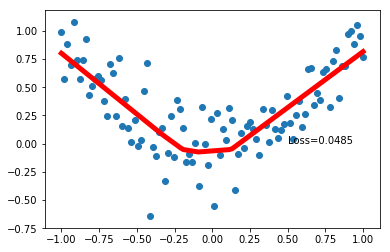

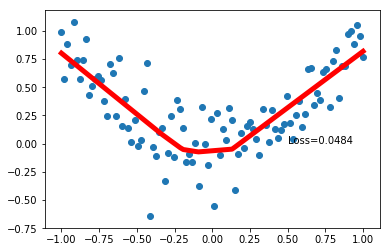

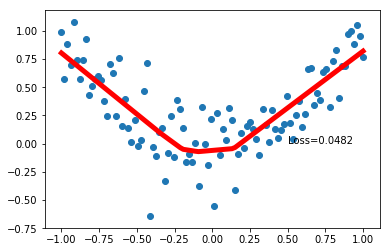

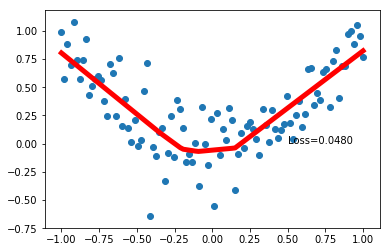

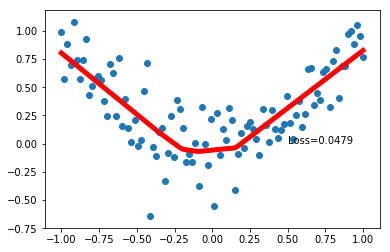

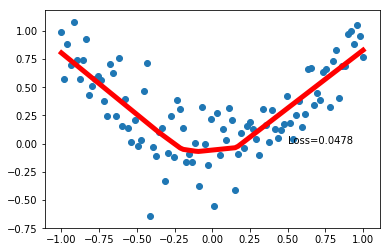

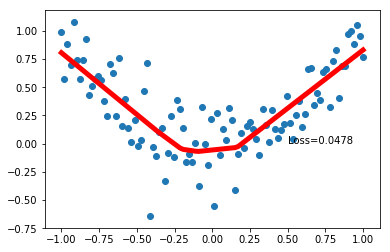

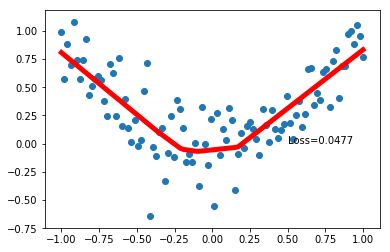

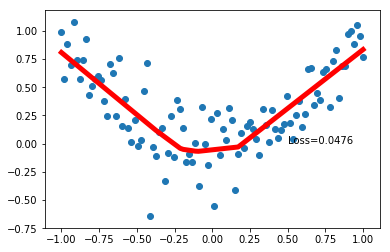

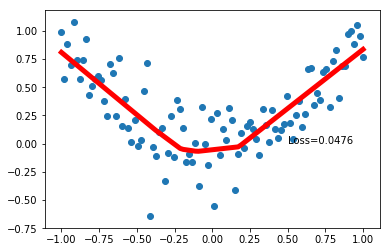

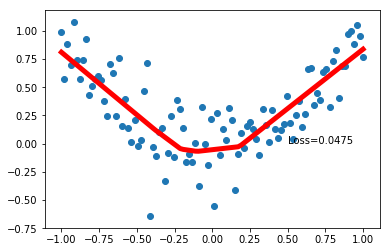

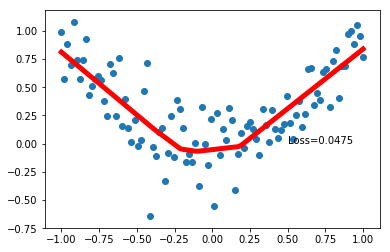

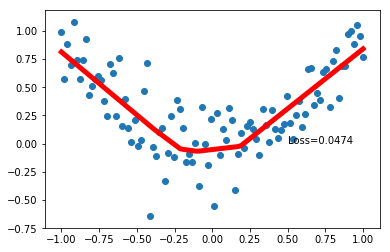

In [116]:
for  t in range(200):
    prediction=net(x)
    loss=loss_func(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t%5==0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
        plt.text(0.5,0,'Loss=%.4f'%loss.data.numpy())
        plt.pause(.1)
plt.ioff()
plt.show()